In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Definieer wat waardes voor je k's
k1 = 100000000 # kon for E + S to ES
k2 = 1000               # koff for ES to E + S
k3 = 890000
k4 = 0.0225
k5 = 0
k6 = 0
kcat = 0.01

# Definieer de concentraties op T=0 (in eerste instantie: voor inhibitie of substraat)
E0 = 70*10**-6
ES0 = 0
P0 = 0
EI0 = 0
EIi0 = 0  #(EI*)

#Definieer constanten
I0 = 10*10**-6
S0 = 0*10**-6
dt = 0.001 #Dit is hoe groot je simulatie tijdstappen zijn

tframe = 60 #save a frame every 60 s
tincub = 1800 #incubate for 1800 s
tsub = 0  # Run with substrate for 1800 s

In [0]:
concentraties = np.array([E0, ES0, P0, EI0, EIi0], dtype=np.double) #matrix van concentraties

In [0]:
# Voor toevoeging van S



                        # [         E,       ES, P,     EI, EI*]
#tijdevolutie0 = np.array([[-k3*I-k1*S,  k2+kcat, 0,     k4,   0],  #E
#                          [      k1*S, -k2-kcat, 0,      0,   0],  #ES
#                          [         0,     kcat, 0,      0,   0],  #P
#                          [      k3*I,        0, 0, -k4-k5,  k6],  #EI
#                          [         0,        0, 0,     k5, -k6]]) #EI*

#verandering in E   = [E]*(-k3*I-k1*S) + [ES]*(k2+kcat)  + [P]*(0) + [EI]*(k4)     + [EI*]*(0)
#verandering in ES  = [E]*(k1*S)       + [ES]*(-k2-kcat) + [P]*(0) + [EI]*(0)      + [EI*]*(0)
#verandering in P   = [E]*(0)          + [ES]*(kcat)     + [P]*(0) + [EI]*(0)      + [EI*]*(0)
#verandering in EI  = [E]*(k3*I)       + [ES]*(0)        + [P]*(0) + [EI]*(-k4-k5) + [EI*]*(k6)
#verandering in EI* = [E]*(0)          + [ES]*(0)        + [P]*(0) + [EI]*(k5)     + [EI*]*(-k6)

In [0]:
# Maak een lijst van kopien van de concentraties
S=0 # Geen S in je systeem

plot = [concentraties.copy()]

tijdconc = concentraties
t = 0
# Voor toevoging van S (tincub/dt stappen = 30min)
for i in range(int(tincub/dt)):
    t+= 1
    I = I0-(tijdconc[3]+tijdconc[4]) #subtract EI and EI* from I0
                            # [         E,       ES, P,     EI, EI*]
    tijdevolutie0 = np.array([[-k3*I-k1*S,  k2+kcat, 0,     k4,   0],  #E
                              [      k1*S, -k2-kcat, 0,      0,   0],  #ES
                              [         0,     kcat, 0,      0,   0],  #P
                              [      k3*I,        0, 0, -k4-k5,  k6],  #EI
                              [         0,        0, 0,     k5, -k6]]) #EI*
    tijdconc += np.dot(tijdevolutie0*dt, tijdconc) # Doe 1 dt tijdstap
    if (tijdconc < 0).any():
        raise ValueError("got a negative concentration, try decreasing dt")

    
    if t % int(tframe/dt)==0:
        plot.append(tijdconc.copy()) # Voeg de nieuwe concentraties toe aan de lijst
  
# Na toevoeging van S (tsub/dt stappen)
S=S0

for i in range(int(tsub/dt)):
    t += 1
    I = I0-(tijdconc[3]+tijdconc[4]) #subtract EI and EI* from I0
    S = S0-(tijdconc[1]+tijdconc[2]) #Subtract ES and P from S0
    tijdevolutie1 = np.array([[-k3*I-k1*S, k2+kcat, 0, k4, 0],
                         [k1*S, -k2-kcat, 0, 0, 0],
                         [0, kcat, 0, 0, 0],
                         [k3*I, 0, 0, -k4-k5, k6],
                         [0, 0, 0, k5, -k6]])
    tijdconc += np.dot(tijdevolutie1*dt, tijdconc) #Doe 1 dt tijdstap
    if (tijdconc < 0).any():
        raise ValueError("got a negative concentration, try decreasing dt")

    
    if t % int(tframe/dt)==0:
        plot.append(tijdconc.copy()) # Voeg de nieuwe concentraties toe aan de lijst


In [0]:
# Splits de lijst van figuren in E, ES, P, EI en EI*
Eplot = [] 
ESplot = []
Pplot = []
EIplot = []
EIiplot = []
EItot = []
for frame in plot:
    Eplot.append(frame[0])
    ESplot.append(frame[1])
    Pplot.append(frame[2])
    EIplot.append(frame[3])
    EIiplot.append(frame[4])
    EItot.append(frame[3]+frame[4]) 

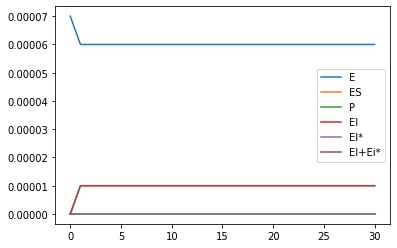

In [0]:
# Plot de figuren
labels = ('E', 'ES', "P", "EI", "EI*", "EI+Ei*")
for i,y in enumerate((Eplot, ESplot, Pplot, EIplot, EIiplot, EItot)):
    plt.plot(y, label=labels[i])
plt.legend()

(0, 7e-05)

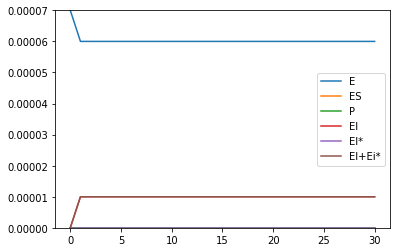

In [0]:
# Plot de figuren
labels = ('E', 'ES', "P", "EI", "EI*", "EI+Ei*")
for i,y in enumerate((Eplot, ESplot, Pplot, EIplot, EIiplot, EItot)):
    plt.plot(y, label=labels[i])
plt.legend()
plt.ylim(0,E0) #zoom in tot E0

In [0]:
print(Eplot)

[7e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05, 6.0004211413074333e-05]


In [0]:
import pandas as pd

In [0]:
dataframe = pd.DataFrame(data={'E':Eplot,  "EI":EIplot, "EIi":EIiplot, "ES":ESplot, "P":Pplot})

In [0]:
print(dataframe.to_csv())

,E,EI,EIi,ES,P
0,7e-05,0.0,0.0,0.0,0.0
1,6.0004211413074333e-05,9.99578858692572e-06,0.0,0.0,0.0
2,6.0004211413074333e-05,9.99578858692572e-06,0.0,0.0,0.0
3,6.0004211413074333e-05,9.99578858692572e-06,0.0,0.0,0.0
4,6.0004211413074333e-05,9.99578858692572e-06,0.0,0.0,0.0
5,6.0004211413074333e-05,9.99578858692572e-06,0.0,0.0,0.0
6,6.0004211413074333e-05,9.99578858692572e-06,0.0,0.0,0.0
7,6.0004211413074333e-05,9.99578858692572e-06,0.0,0.0,0.0
8,6.0004211413074333e-05,9.99578858692572e-06,0.0,0.0,0.0
9,6.0004211413074333e-05,9.99578858692572e-06,0.0,0.0,0.0
10,6.0004211413074333e-05,9.99578858692572e-06,0.0,0.0,0.0
11,6.0004211413074333e-05,9.99578858692572e-06,0.0,0.0,0.0
12,6.0004211413074333e-05,9.99578858692572e-06,0.0,0.0,0.0
13,6.0004211413074333e-05,9.99578858692572e-06,0.0,0.0,0.0
14,6.0004211413074333e-05,9.99578858692572e-06,0.0,0.0,0.0
15,6.0004211413074333e-05,9.99578858692572e-06,0.0,0.0,0.0
16,6.0004211413074333e-05,9.99578858692572e-06,0.0,0.0,0.0
17,6.0004211413074333e-05,